In [ ]:
# Import libraries

import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# Load data

etfs = ['SPY', 'QQQ', 'IWM', 'EFA', 'EEM', 'VNQ', 'TLT', 'IEF', 'GLD', 'USO']

prices = yf.download(etfs, start="2018-01-01", end="2023-12-31", group_by='ticker', auto_adjust=True)
adj_close_prices = prices.xs('Close', level=1, axis=1)
returns = adj_close_prices.pct_change().dropna()

[*********************100%***********************]  10 of 10 completed


In [ ]:
# Set up equal weight portfolio

n_assets = len(etfs)
equal_weights = np.ones(n_assets) / n_assets  # 10% each ETF

# Restrict to test set for fair comparison
test_returns = returns.loc['2023-01-01':]
portfolio_returns = test_returns.dot(equal_weights)



In [ ]:
# Simulate wealth
wealth = (1 + portfolio_returns).cumprod()


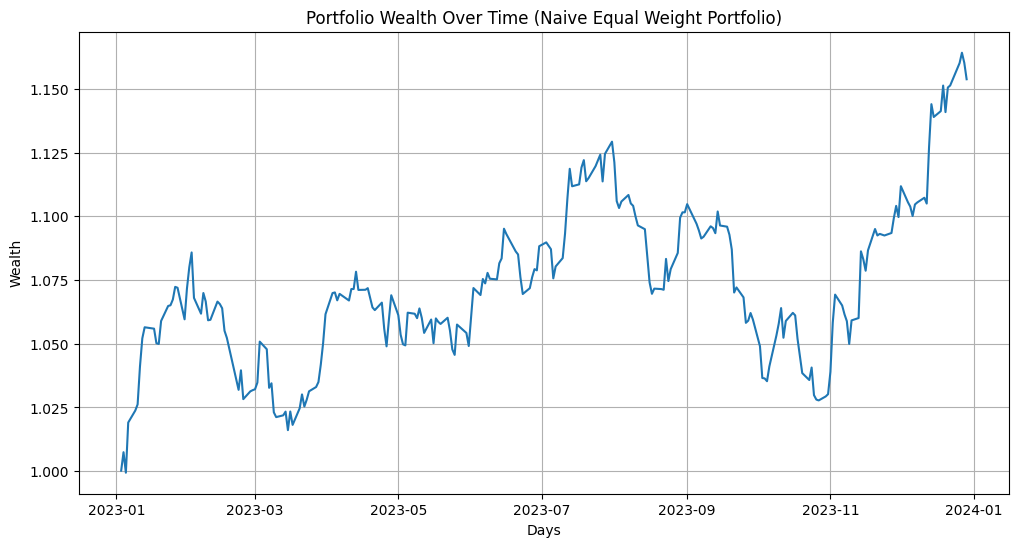

In [ ]:
# Plotting wealth over time

plt.figure(figsize=(12,6))
plt.plot(wealth)
plt.title('Portfolio Wealth Over Time (Naive Equal Weight Portfolio)')
plt.xlabel('Days')
plt.ylabel('Wealth')
plt.grid()
plt.savefig("naive_portfolio_plot.png")
plt.show()

In [ ]:
# Metrics 
annualized_return = portfolio_returns.mean() * 252
annualized_volatility = portfolio_returns.std() * np.sqrt(252)
sharpe_ratio = annualized_return / annualized_volatility

print(f"Annualized Return: {annualized_return:.2%}")
print(f"Annualized Volatility: {annualized_volatility:.2%}")
print(f"Sharpe Ratio: {sharpe_ratio:.2f}")


Annualized Return: 15.00%
Annualized Volatility: 10.70%
Sharpe Ratio: 1.40


In [ ]:
# Save Metrics
with open("naive_metrics.txt", "w") as f:
    f.write(f"Annualized Return: {annualized_return:.2%}\n")
    f.write(f"Annualized Volatility: {annualized_volatility:.2%}\n")
    f.write(f"Sharpe Ratio: {sharpe_ratio:.2f}\n")
